# Basic Visualization
---

## Setup

**Import Libraries**

In [3]:
# data management
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [26]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/riki-profile/hck018/refs/heads/main/webscrapping/sample%20-%20superstore%20-%20Orders.csv')

# display df
display(df.head())

# df summary
df.info()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Barchart

**Pandas**

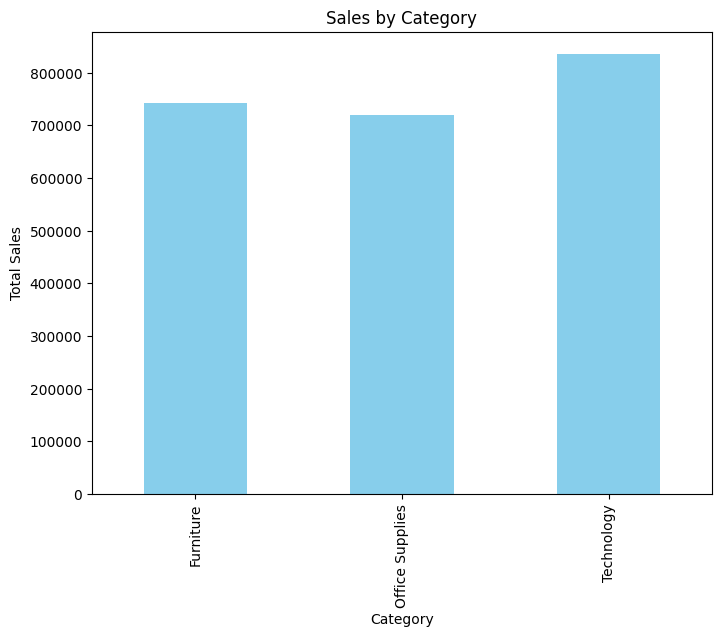

In [6]:
# Group data by Category and sum Sales
category_sales = df.groupby('Category')['Sales'].sum()

# Create bar chart using Pandas
category_sales.plot(kind='bar', figsize=(8,6), color='skyblue', title='Sales by Category')

# Show the plot
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


**Matplotlib**

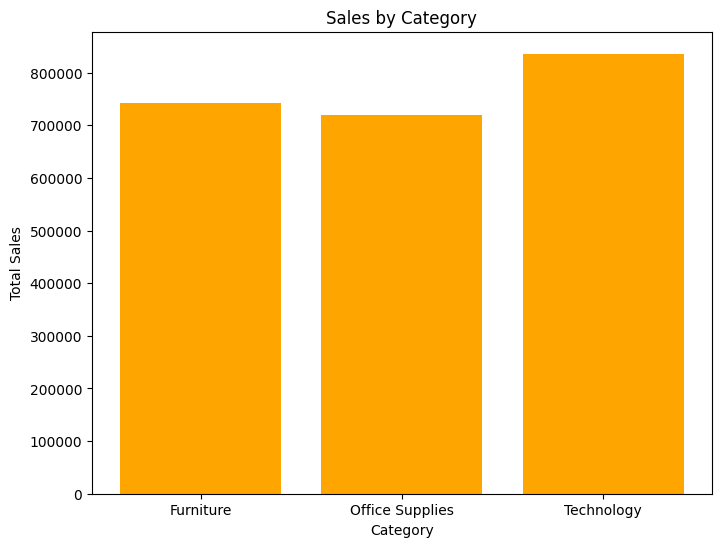

In [7]:
# Prepare data
category_sales = df.groupby('Category')['Sales'].sum()

# Create bar chart using Matplotlib
plt.figure(figsize=(8,6))
plt.bar(category_sales.index, category_sales.values, color='orange')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


**Seaborn**

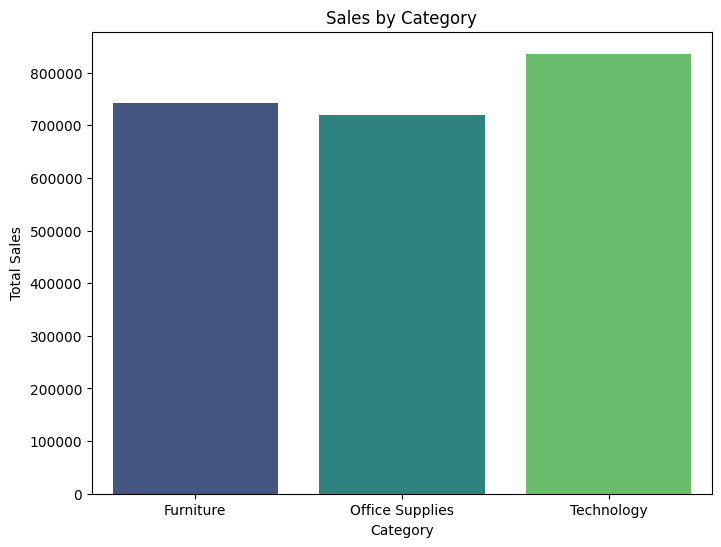

In [11]:
# Prepare data
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Create bar chart using Seaborn
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Sales', data=category_sales, hue='Category', legend=False, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales by Category')

# Show the plot
plt.show()


## Pie Chart

**Pandas**

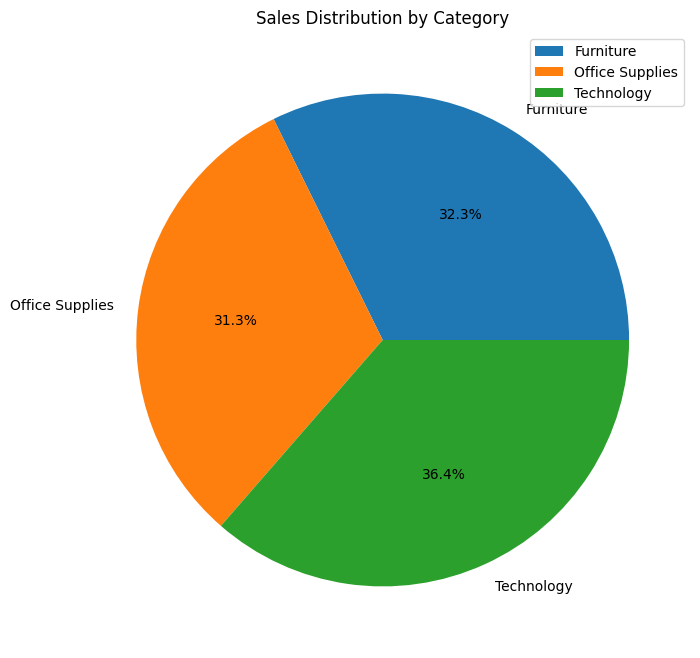

In [13]:
# Prepare the data
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Create pie chart using Pandas
category_sales.set_index('Category').plot(kind='pie', y='Sales', autopct='%1.1f%%', figsize=(8,8), title='Sales Distribution by Category')

# Show the plot
plt.ylabel('')  # Remove default label
plt.show()


**Matplotlib**

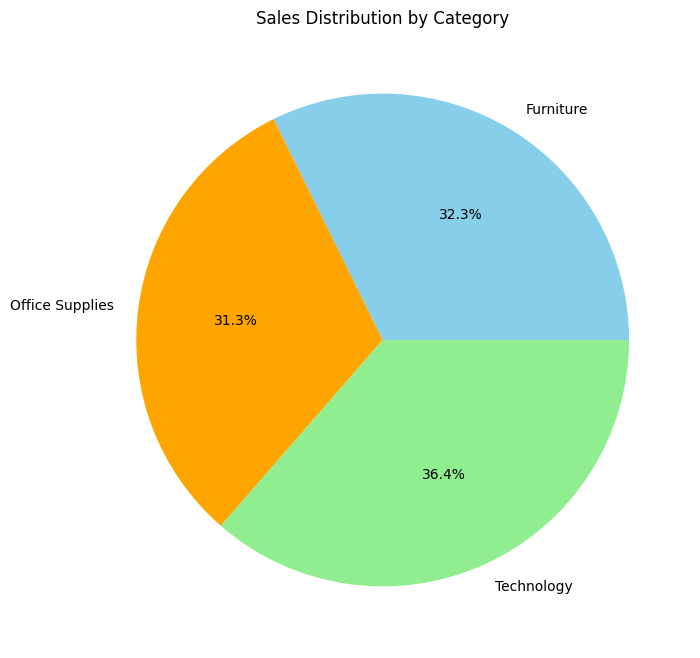

In [15]:
# Prepare the data
category_sales = df.groupby('Category')['Sales'].sum()

# Create pie chart using Matplotlib
plt.figure(figsize=(8,8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Sales Distribution by Category')

# Show the plot
plt.show()


**Seaborn**


Seaborn does not have built-in pie chart support, so you can still rely on Matplotlib for pie charts when using Seaborn.

## Line Chart

**Pandas**

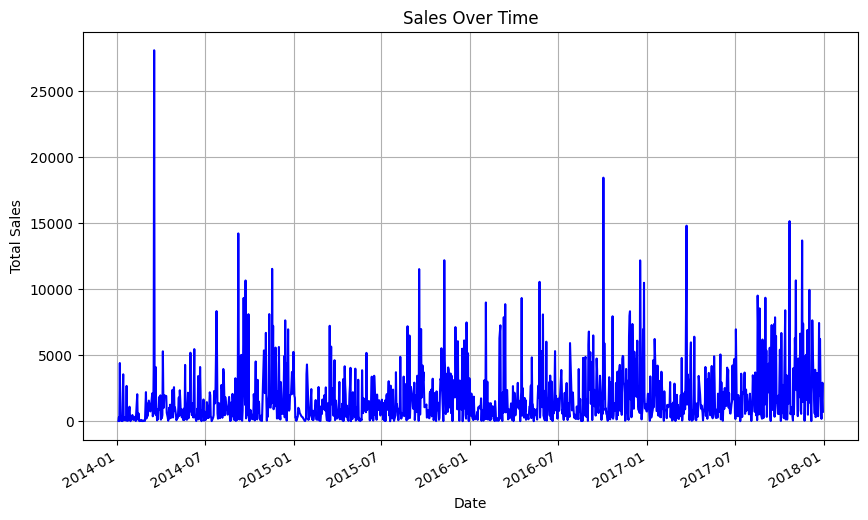

In [16]:
# Convert Order Date to datetime and group by date
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_data = df.groupby('Order Date')['Sales'].sum()

# Create line chart using Pandas
sales_data.plot(kind='line', figsize=(10,6), title='Sales Over Time', color='blue')

# Show the plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Matplotlib**

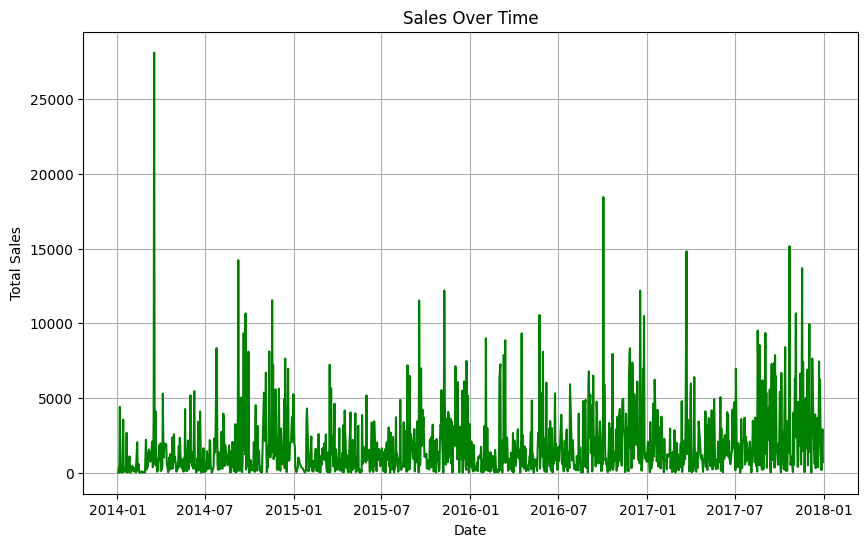

In [17]:
# Create line chart using Matplotlib
plt.figure(figsize=(10,6))
plt.plot(sales_data.index, sales_data.values, color='green')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()

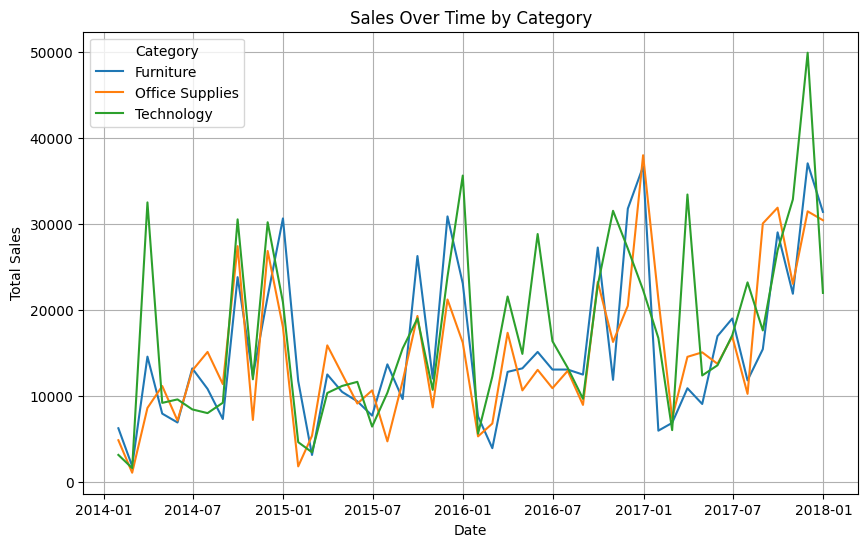

In [27]:
# copy data
data = df.copy()

# Assuming df is your DataFrame and it has a 'Category' and 'Order Date' columns
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

# Group by 'Category' and resample by month to get monthly sales
category_sales = data.groupby('Category').resample('ME')['Sales'].sum().unstack(level=0)

# Create line chart using Matplotlib
plt.figure(figsize=(10,6))
for category in category_sales.columns:
    plt.plot(category_sales.index, category_sales[category], label=category)

plt.title('Sales Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)

# Show the plot
plt.show()


**Seaborn**

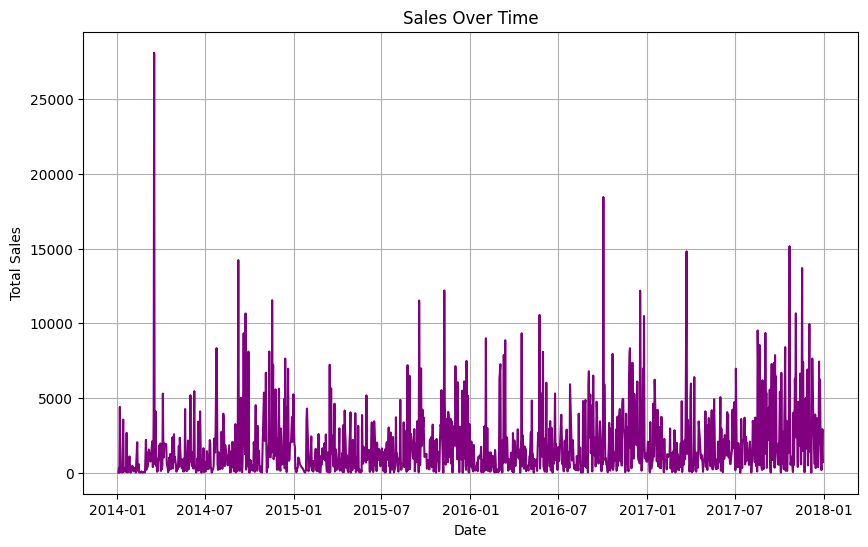

In [18]:
# Reset index to convert dates to columns
sales_data = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create line chart using Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Order Date', y='Sales', data=sales_data, color='purple')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()


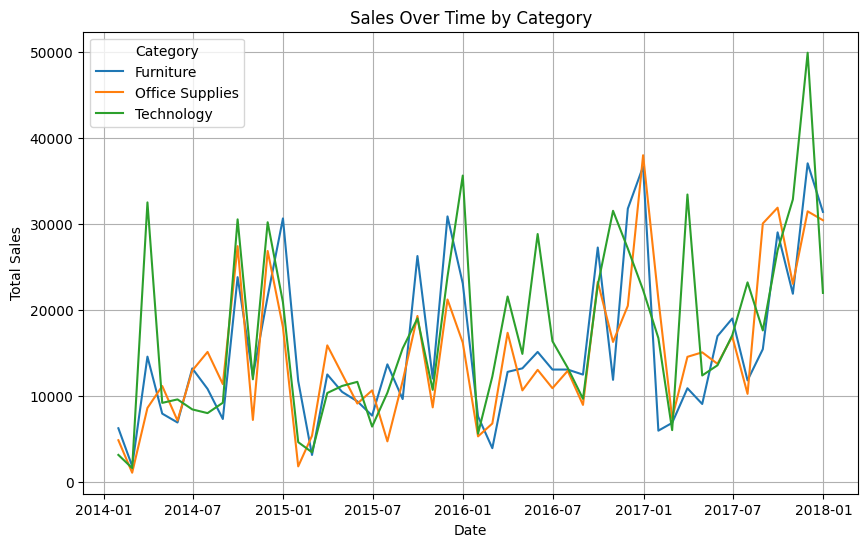

In [29]:
# copy data
data = df.copy()

# Assuming df is your DataFrame and it has a 'Category' and 'Order Date' columns
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Group by 'Category' and resample by month to get monthly sales
category_sales = data.groupby(['Category', pd.Grouper(key='Order Date', freq='ME')])['Sales'].sum().reset_index()

# Create line chart using Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=category_sales, x='Order Date', y='Sales', hue='Category')

plt.title('Sales Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()


## Area Chart

**Pandas**

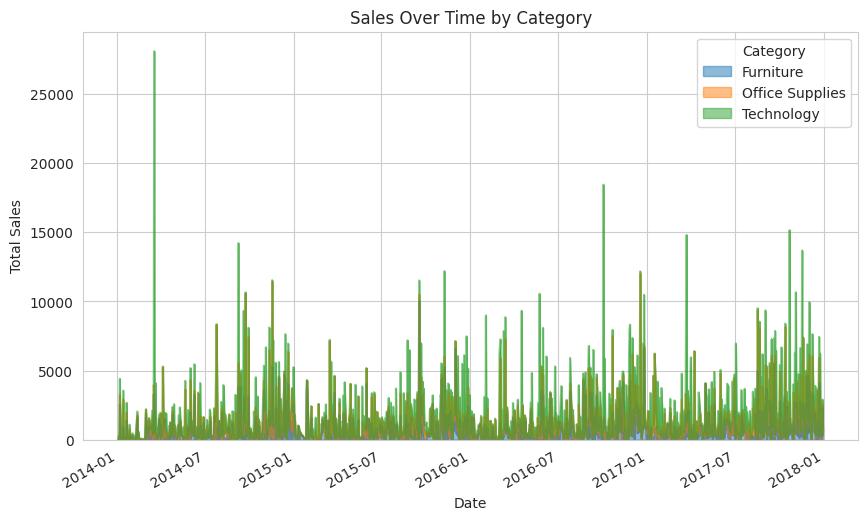

In [36]:
# copy data
data = df.copy()

# Assuming df is your DataFrame and it has a 'Category' and 'Order Date' columns
data['Order Date'] = pd.to_datetime(data['Order Date'])
category_sales = data.groupby(['Order Date', 'Category'])['Sales'].sum().unstack().fillna(0)

# Create area chart using Pandas
category_sales.plot(kind='area', figsize=(10,6), alpha=0.5)
plt.title('Sales Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)

# Show the plot
plt.show()


**Matplotlib**

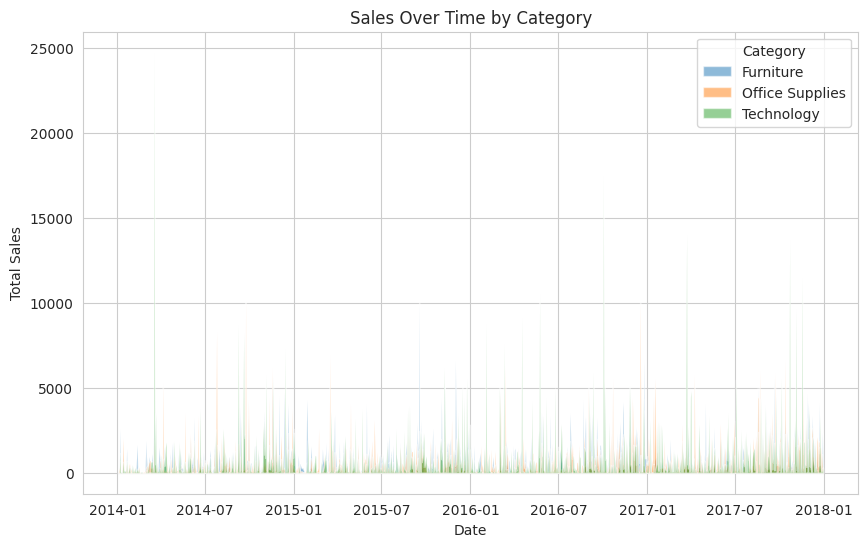

In [37]:
# Create area chart using Matplotlib
plt.figure(figsize=(10,6))
for category in category_sales.columns:
    plt.fill_between(category_sales.index, category_sales[category], alpha=0.5, label=category)

plt.title('Sales Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)

# Show the plot
plt.show()


**Seaborn**

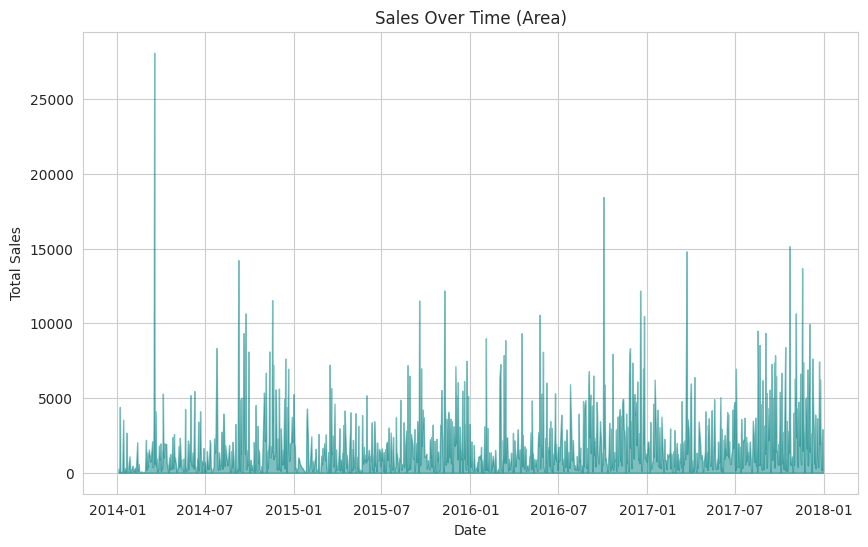

In [39]:
# Using Matplotlib with Seaborn's aesthetics
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.fill_between(sales_data['Order Date'], sales_data['Sales'], color='teal', alpha=0.5)
plt.title('Sales Over Time (Area)')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


## Scatterplot

**Pandas**

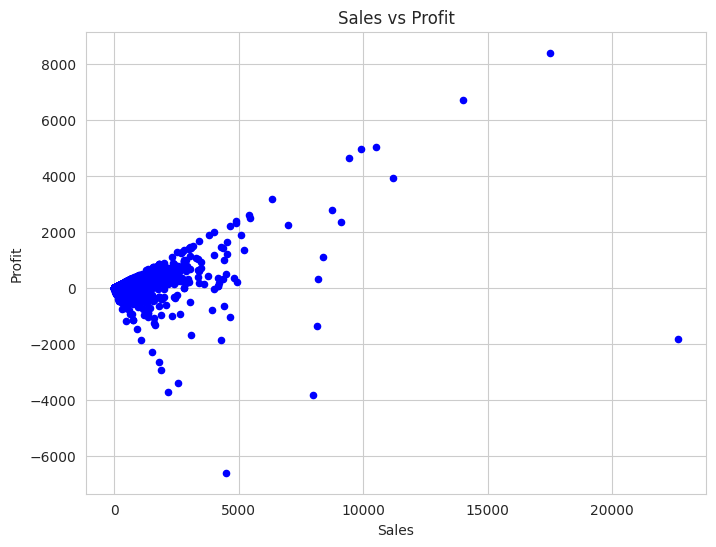

In [44]:
# Create scatterplot using Pandas
df.plot(kind='scatter', x='Sales', y='Profit', figsize=(8,6), title='Sales vs Profit', color='blue')

# Show the plot
plt.show()


**Matplotlib**

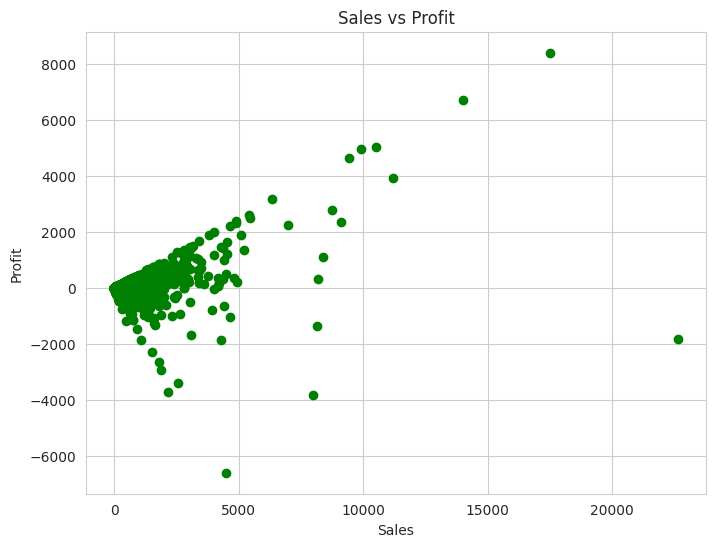

In [45]:
# Create scatterplot using Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['Sales'], df['Profit'], color='green')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show the plot
plt.show()


**Seaborn**

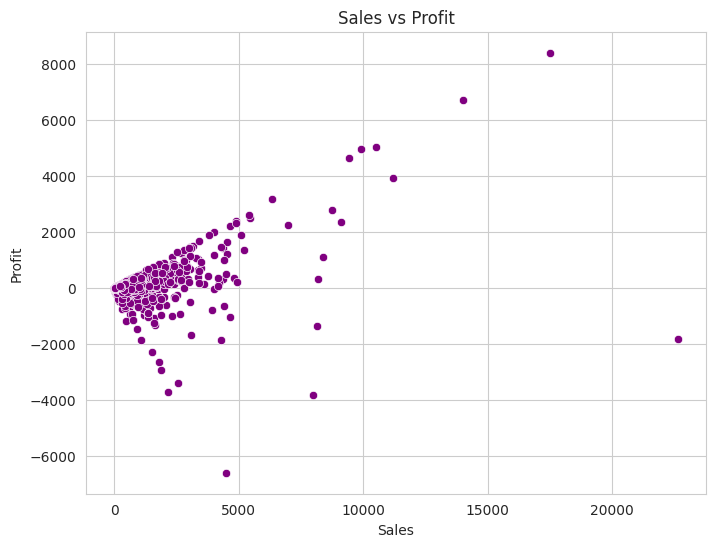

In [46]:
# Create scatterplot using Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', data=df, color='purple')
plt.title('Sales vs Profit')

# Show the plot
plt.show()


## Bubble Chart

**Pandas**

Pandas does not have built-in support for bubble charts, so we can rely on Matplotlib for this.

**Matplotlib**

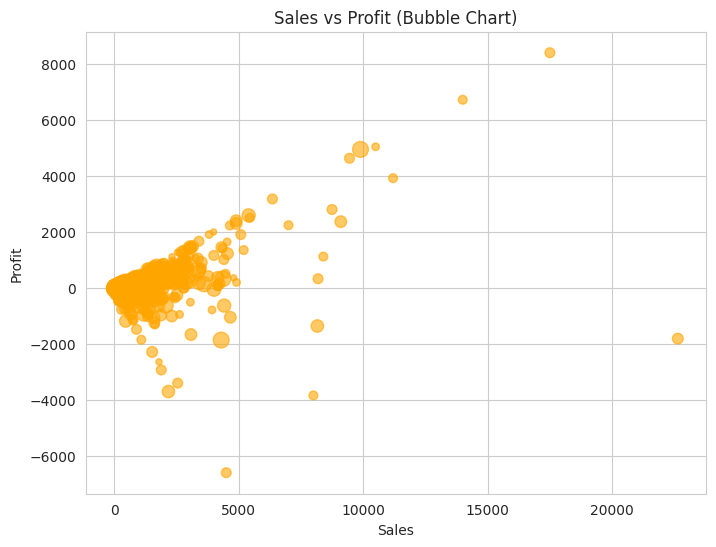

In [47]:
# Create bubble chart using Matplotlib (scatterplot with size)
plt.figure(figsize=(8,6))
plt.scatter(df['Sales'], df['Profit'], s=df['Quantity']*10, color='orange', alpha=0.6)
plt.title('Sales vs Profit (Bubble Chart)')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show the plot
plt.show()


**Seaborn**

Seaborn does not have direct support for bubble charts either, but you can use sns.scatterplot() with the size parameter.

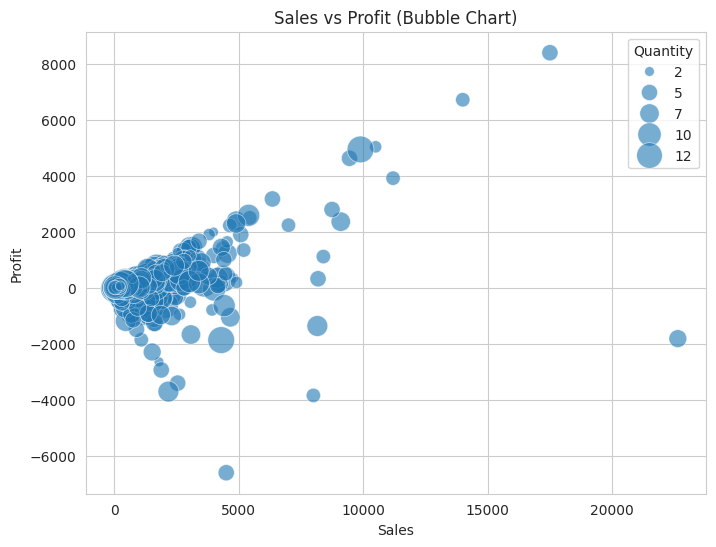

In [48]:
# Create bubble chart using Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', size='Quantity', data=df, sizes=(20, 400), alpha=0.6)
plt.title('Sales vs Profit (Bubble Chart)')

# Show the plot
plt.show()


## Heatmap

**Pandas**

Pandas doesn't have direct support for heatmaps, so we'll focus on Matplotlib and Seaborn for this visualization.

**Matplotlib**

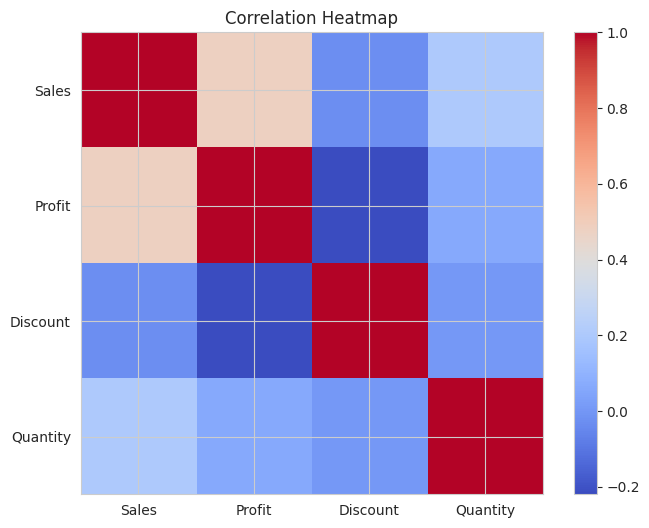

In [49]:
import numpy as np

# Prepare correlation data
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()

# Create heatmap using Matplotlib
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(np.arange(len(corr.columns)), corr.columns)
plt.yticks(np.arange(len(corr.index)), corr.index)

# Show the plot
plt.show()


**Seaborn**

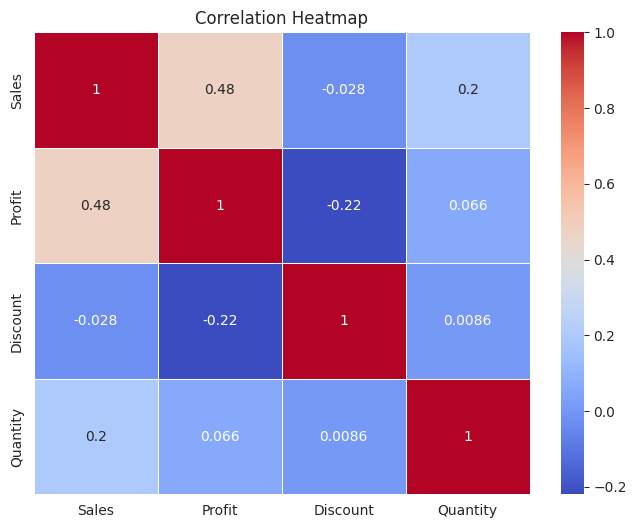

In [50]:
# Create heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


## Boxplot

**Pandas**

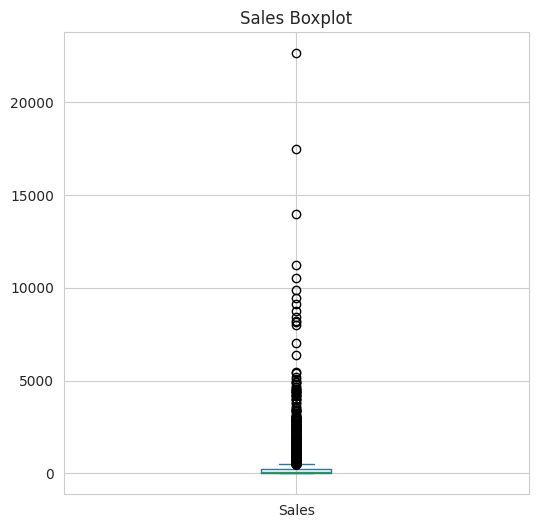

In [51]:
# Single boxplot using Pandas
df['Sales'].plot(kind='box', figsize=(6,6), title='Sales Boxplot')

# Show the plot
plt.show()




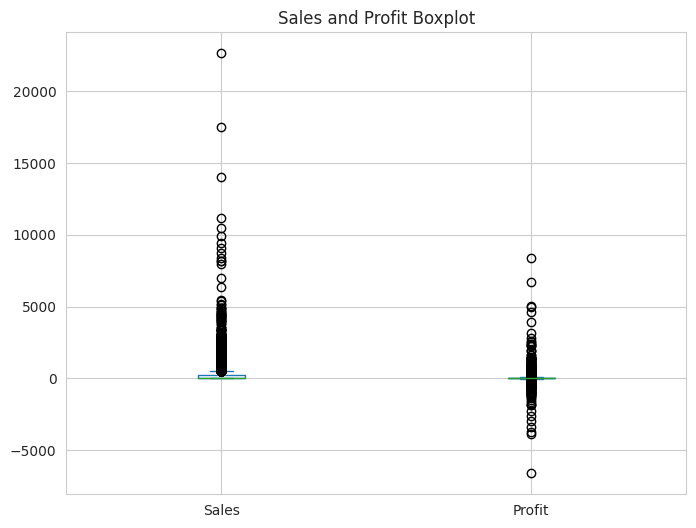

In [52]:
# Multiple boxplots using Pandas
df[['Sales', 'Profit']].plot(kind='box', figsize=(8,6), title='Sales and Profit Boxplot')

# Show the plot
plt.show()

**Matplotlib**

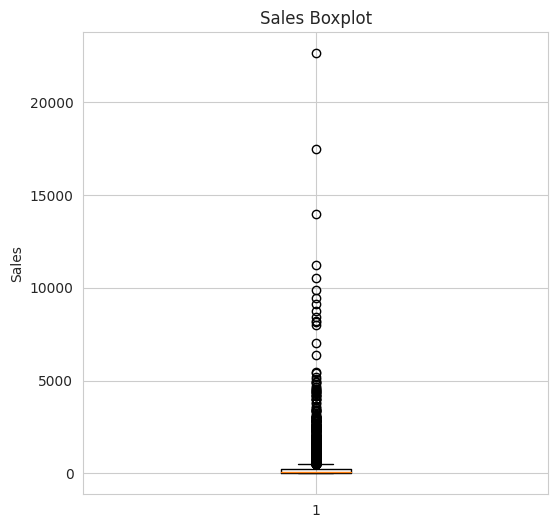

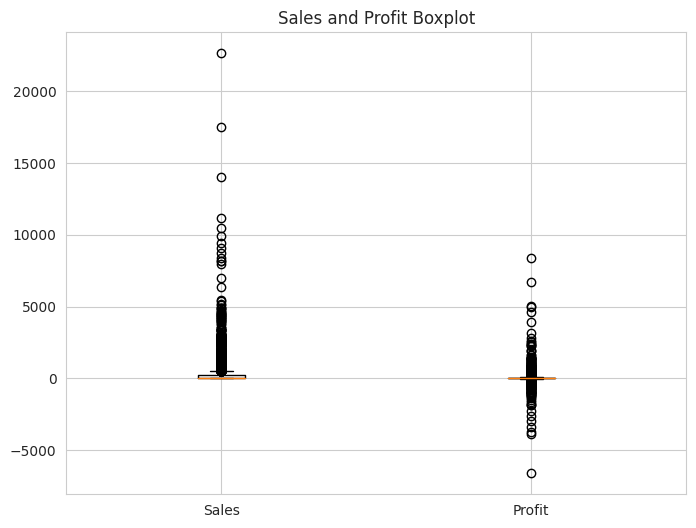

In [53]:
# Single boxplot using Matplotlib
plt.figure(figsize=(6,6))
plt.boxplot(df['Sales'])
plt.title('Sales Boxplot')
plt.ylabel('Sales')

# Show the plot
plt.show()

# Multiple boxplots using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([df['Sales'], df['Profit']], labels=['Sales', 'Profit'])
plt.title('Sales and Profit Boxplot')

# Show the plot
plt.show()


**Seaborn**

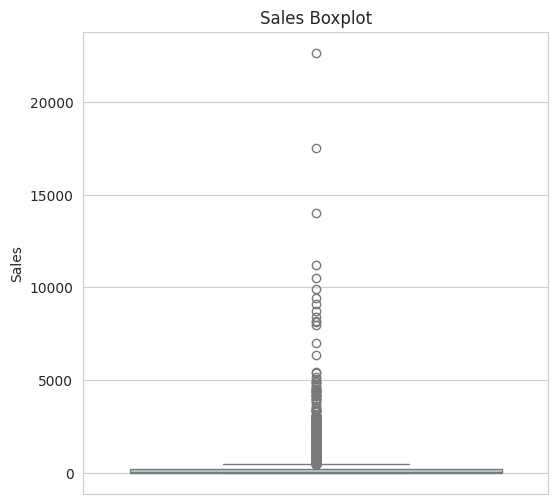

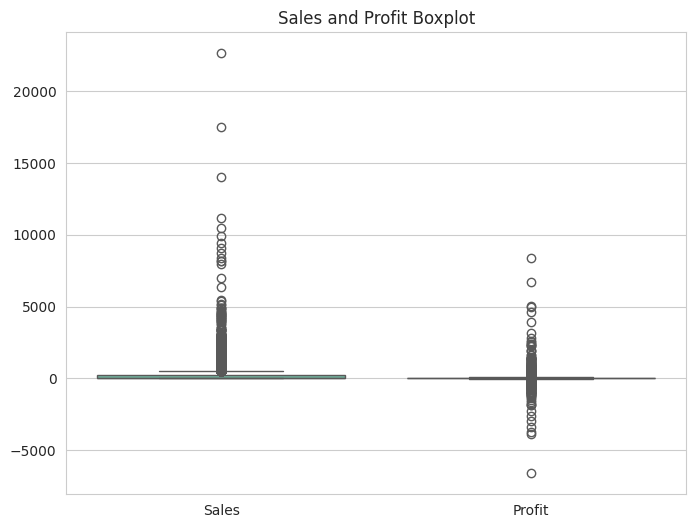

In [54]:
# Single boxplot using Seaborn
plt.figure(figsize=(6,6))
sns.boxplot(y='Sales', data=df, color='lightblue')
plt.title('Sales Boxplot')

# Show the plot
plt.show()

# Multiple boxplots using Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Sales', 'Profit']], palette='Set2')
plt.title('Sales and Profit Boxplot')

# Show the plot
plt.show()


## Histogram

**Pandas**

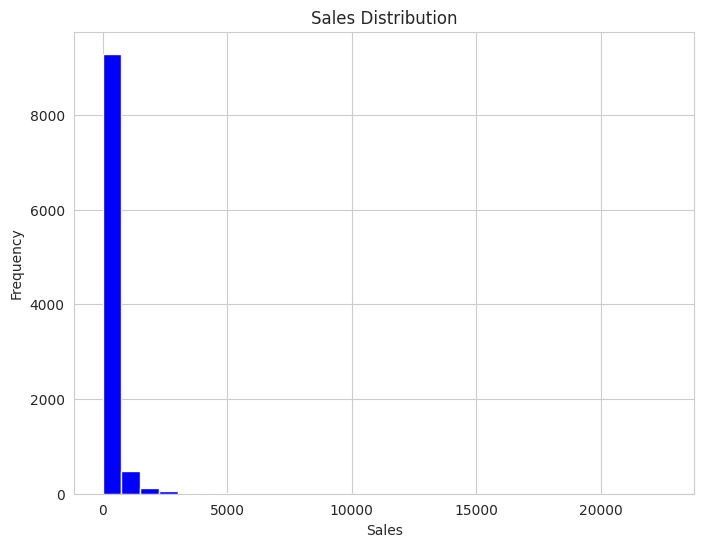

In [55]:
# Create histogram using Pandas
df['Sales'].plot(kind='hist', bins=30, figsize=(8,6), title='Sales Distribution', color='blue')

# Show the plot
plt.xlabel('Sales')
plt.show()

**Matplotlib**

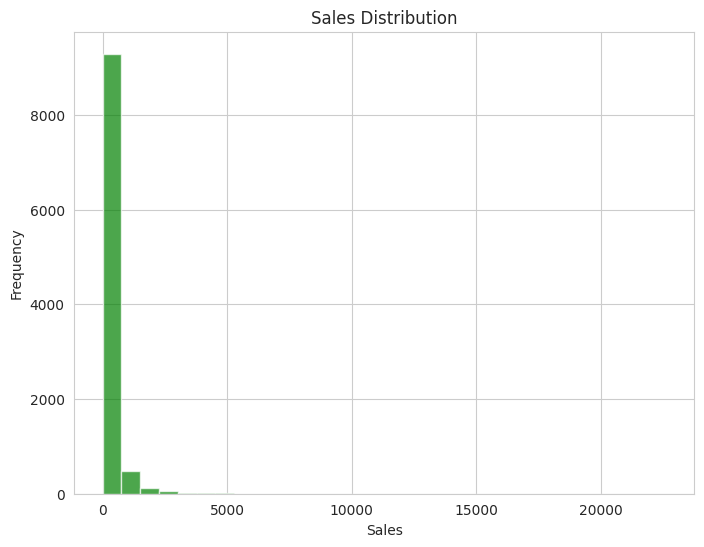

In [56]:
# Create histogram using Matplotlib
plt.figure(figsize=(8,6))
plt.hist(df['Sales'], bins=30, color='green', alpha=0.7)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Show the plot
plt.show()


**Seaborn**

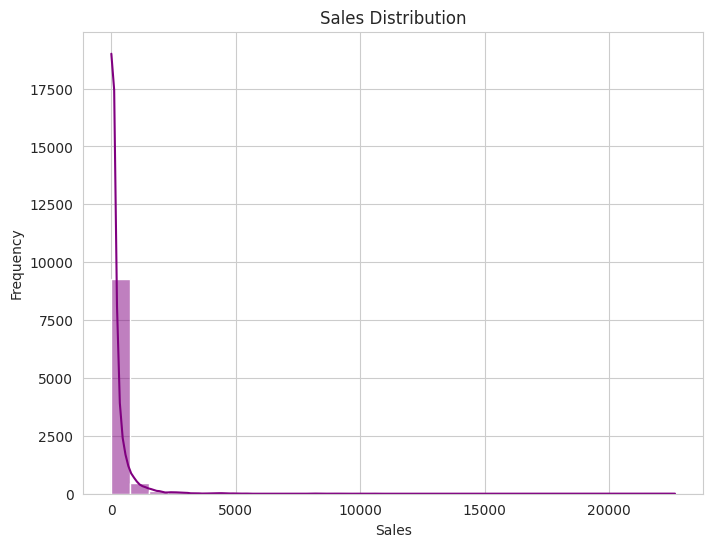

In [57]:
# Create histogram using Seaborn
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
plt.title('Sales Distribution')

# Show the plot
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


## Subplot

### Creating Subplot

1. Using `plt.subplot()`

The `plt.subplot()` function allows you to define a grid and specify where each plot should appear.

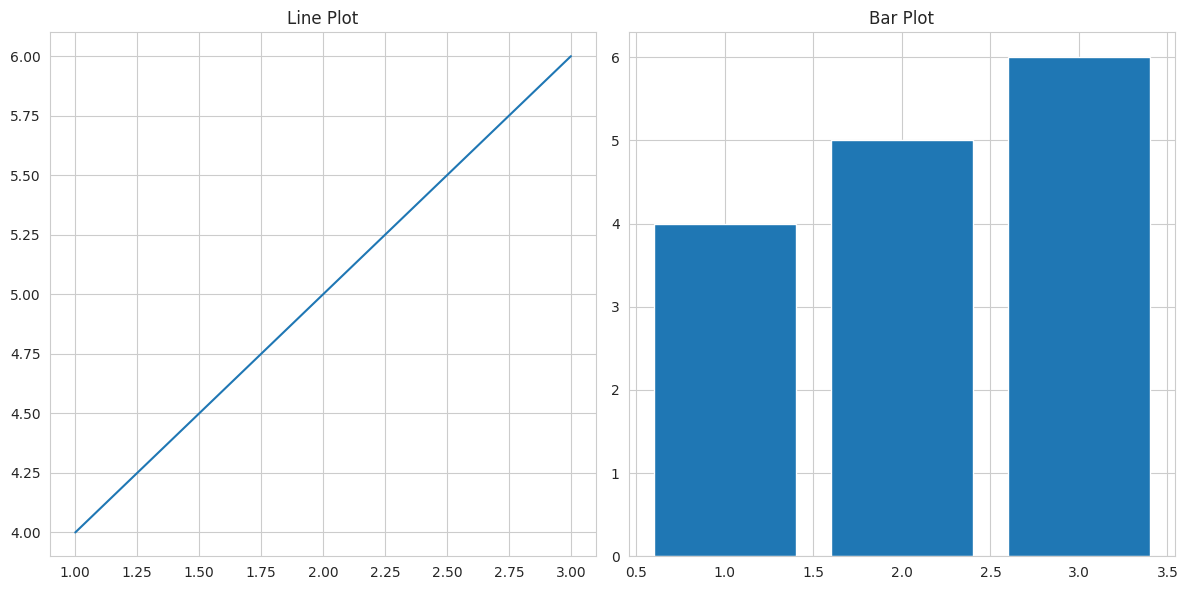

In [42]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot (position 1)
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Line Plot')

# Second subplot (position 2)
plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.bar([1, 2, 3], [4, 5, 6])
plt.title('Bar Plot')

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()


2. Using `plt.subplots()`

A more flexible and common approach is to use `plt.subplots()`, which returns both a figure and an array of axes for placing your plots.

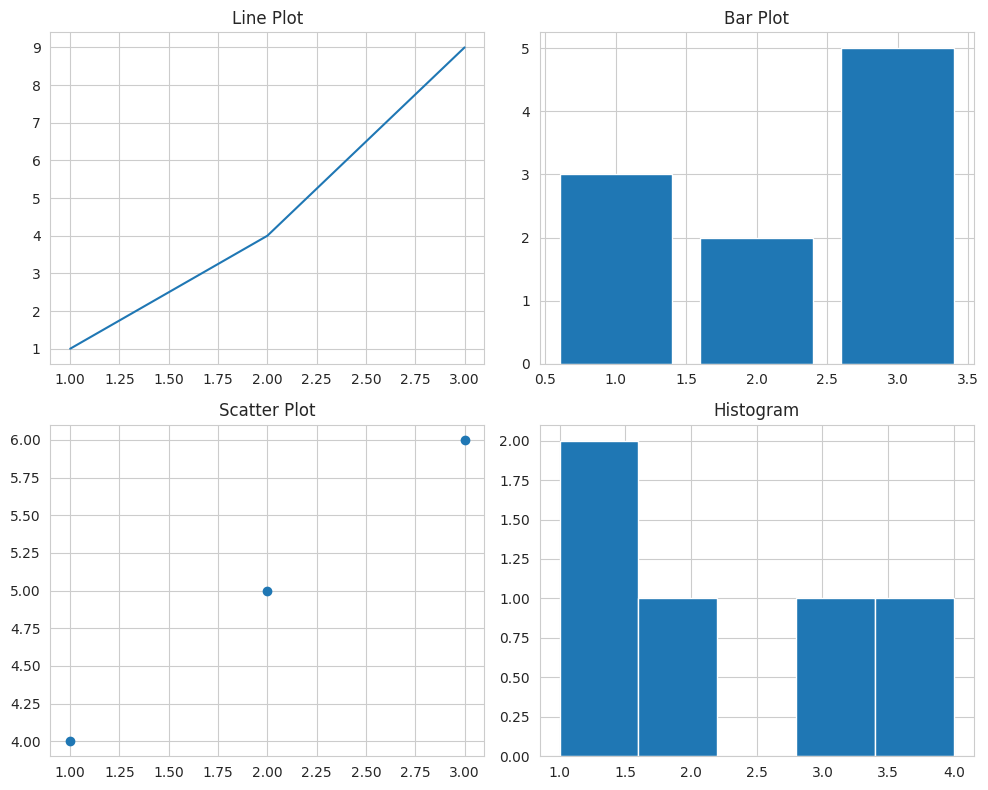

In [43]:
# Create 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# First subplot (top left)
axs[0, 0].plot([1, 2, 3], [1, 4, 9])
axs[0, 0].set_title('Line Plot')

# Second subplot (top right)
axs[0, 1].bar([1, 2, 3], [3, 2, 5])
axs[0, 1].set_title('Bar Plot')

# Third subplot (bottom left)
axs[1, 0].scatter([1, 2, 3], [4, 5, 6])
axs[1, 0].set_title('Scatter Plot')

# Fourth subplot (bottom right)
axs[1, 1].hist([1, 1, 2, 3, 4], bins=5)
axs[1, 1].set_title('Histogram')

plt.tight_layout()  # Adjust spacing
plt.show()


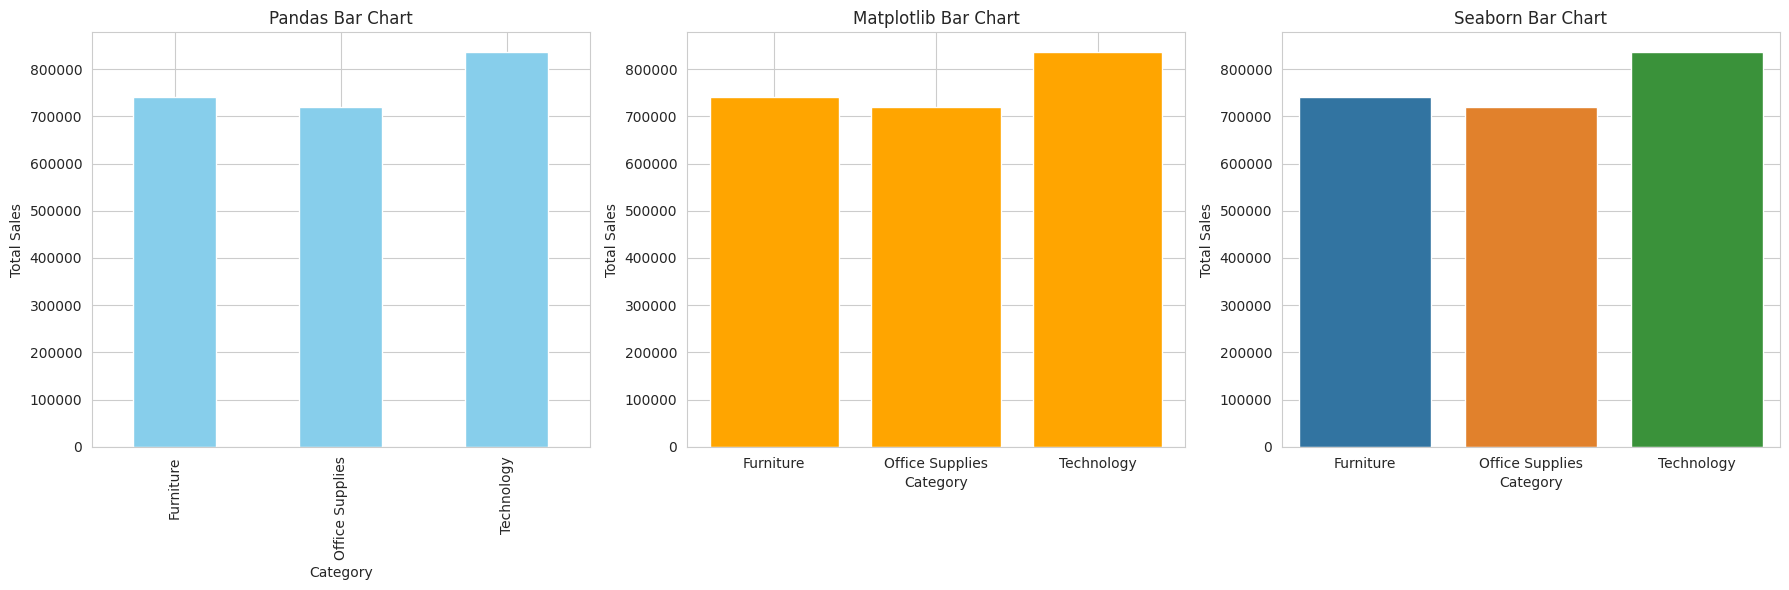

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/riki-profile/hck018/refs/heads/main/webscrapping/sample%20-%20superstore%20-%20Orders.csv')

# Prepare data: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1st subplot: Bar chart using Pandas
category_sales.plot(kind='bar', ax=axs[0], color='skyblue', title='Pandas Bar Chart')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Total Sales')

# 2nd subplot: Bar chart using Matplotlib
axs[1].bar(category_sales.index, category_sales.values, color='orange')
axs[1].set_title('Matplotlib Bar Chart')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Total Sales')

# 3rd subplot: Bar chart using Seaborn
category_sales_df = category_sales.reset_index()  # Convert to DataFrame for seaborn
sns.barplot(x='Category', y='Sales', data=category_sales_df, ax=axs[2], hue='Category', legend=False)
axs[2].set_title('Seaborn Bar Chart')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Total Sales')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Draf

### Course Section: Creating Subplots for Data Visualization

In this section, we will cover how to create subplots in Matplotlib, which allows us to display multiple visualizations in a single figure. This is particularly useful when comparing charts side by side or presenting multiple views of the same dataset.

### Learning Objectives:
- Understand what subplots are and when to use them.
- Learn different methods to create subplots using Matplotlib.
- Create subplots with varying row and column arrangements.
- Customize subplots (spacing, titles, labels, etc.).

---

### 1. **What are Subplots?**
Subplots are a way to include multiple plots in one figure. They are arranged in a grid of rows and columns, allowing you to compare different visualizations or combine related plots for better storytelling.

---

### 2. **Creating Subplots: Basic Methods**

#### a. **Method 1: Using `plt.subplot()`**

The `plt.subplot()` function allows you to define a grid and specify where each plot should appear.

```python
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot (position 1)
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Line Plot')

# Second subplot (position 2)
plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.bar([1, 2, 3], [4, 5, 6])
plt.title('Bar Plot')

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()
```

##### **Explanation:**
- `subplot(1, 2, 1)` creates a subplot in a grid of 1 row and 2 columns and places the first plot in position 1.
- `subplot(1, 2, 2)` places the second plot in position 2.
- `plt.tight_layout()` automatically adjusts the spacing between the plots to prevent overlapping.

---

#### b. **Method 2: Using `plt.subplots()`**

A more flexible and common approach is to use `plt.subplots()`, which returns both a figure and an array of axes for placing your plots.

```python
import matplotlib.pyplot as plt

# Create 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# First subplot (top left)
axs[0, 0].plot([1, 2, 3], [1, 4, 9])
axs[0, 0].set_title('Line Plot')

# Second subplot (top right)
axs[0, 1].bar([1, 2, 3], [3, 2, 5])
axs[0, 1].set_title('Bar Plot')

# Third subplot (bottom left)
axs[1, 0].scatter([1, 2, 3], [4, 5, 6])
axs[1, 0].set_title('Scatter Plot')

# Fourth subplot (bottom right)
axs[1, 1].hist([1, 1, 2, 3, 4], bins=5)
axs[1, 1].set_title('Histogram')

plt.tight_layout()  # Adjust spacing
plt.show()
```

##### **Explanation:**
- `plt.subplots(2, 2)` creates a grid of 2 rows and 2 columns.
- `axs[0, 0]`, `axs[0, 1]`, `axs[1, 0]`, and `axs[1, 1]` refer to the positions in the grid, where `[row, col]` specifies the location.
- `fig` is the overall figure, and `axs` is an array of individual subplots (axes).

---

### 3. **Customizing Subplots**

#### a. **Customizing Layout with `gridspec`**

Sometimes, you may want to create subplots with uneven sizes or more complex layouts. For this, you can use `GridSpec`.

```python
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a grid with 2 rows and 2 columns, but customize the layout
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[2, 1])

# Larger subplot spanning the first row
ax1 = fig.add_subplot(gs[0, :])
ax1.plot([1, 2, 3], [1, 4, 9])
ax1.set_title('Line Plot (Spanning First Row)')

# Smaller subplots
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar([1, 2, 3], [3, 2, 5])
ax2.set_title('Bar Plot')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter([1, 2, 3], [4, 5, 6])
ax3.set_title('Scatter Plot')

plt.tight_layout()
plt.show()
```

##### **Explanation:**
- `gridspec.GridSpec(2, 2)` creates a 2x2 grid, but `height_ratios` and `width_ratios` define the size proportions.
- `ax1 = fig.add_subplot(gs[0, :])` creates a subplot that spans both columns of the first row.

---

### 4. **Combining Different Visualization Libraries in Subplots**

You can combine plots created using different libraries (pandas, matplotlib, seaborn) in a single subplot grid. Here's an example using bar charts created with pandas, matplotlib, and seaborn:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Superstore.csv')

# Prepare data
category_sales = df.groupby('Category')['Sales'].sum()

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1st subplot: Bar chart using Pandas
category_sales.plot(kind='bar', ax=axs[0], color='skyblue', title='Pandas Bar Chart')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Total Sales')

# 2nd subplot: Bar chart using Matplotlib
axs[1].bar(category_sales.index, category_sales.values, color='orange')
axs[1].set_title('Matplotlib Bar Chart')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Total Sales')

# 3rd subplot: Bar chart using Seaborn
category_sales_df = category_sales.reset_index()  # Convert to DataFrame for seaborn
sns.barplot(x='Category', y='Sales', data=category_sales_df, ax=axs[2], palette='Blues_d')
axs[2].set_title('Seaborn Bar Chart')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()
```

##### **Explanation:**
- We use subplots to show bar charts created with three different libraries (pandas, matplotlib, seaborn) in one figure for comparison.
- `axs[0]`, `axs[1]`, and `axs[2]` refer to the 1st, 2nd, and 3rd columns of the single-row subplot grid.

---

### 5. **Advanced Customization with `subplots()` Parameters**

The `plt.subplots()` method has several useful parameters:
- **`sharex`**: Share the x-axis between subplots.
- **`sharey`**: Share the y-axis between subplots.
- **`figsize`**: Define the overall figure size.
- **`tight_layout`**: Automatically adjust spacing between subplots to prevent overlap.

Example:

```python
# Subplots with shared x-axis and y-axis
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 6))

axs[0, 0].plot([1, 2, 3], [4, 5, 6])
axs[0, 1].bar([1, 2, 3], [4, 5, 6])
axs[1, 0].scatter([1, 2, 3], [4, 5, 6])
axs[1, 1].hist([1, 2, 3, 3, 2, 1], bins=5)

plt.tight_layout()
plt.show()
```

---

### Summary of Methods:

- **`plt.subplot()`**: Simple and useful for small grids.
- **`plt.subplots()`**: More flexible and powerful, especially for large grids.
- **`gridspec`**: Advanced customization for uneven or complex layouts.
  
You can now create subplot grids in various ways, customize them, and use multiple libraries in a single figure!